In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error

In [73]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [74]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [75]:
len(df_model['Vehicle'].unique())

178

In [76]:
len(df_validation['equipment_id'].unique())

174

In [77]:
validation_vehicles=df_validation['equipment_id'].unique()

In [78]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [79]:
len(df_model_filtered['Vehicle'].unique())

171

In [80]:
df_model['Date']=pd.to_datetime(df_model['Date'])

In [81]:
df_model_filtered

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,ServiceDateTime,Unnamed: 0,DateKey,CalendarDate,Year,Month,...,time_delta_in_seconds,dist,Speed,Acceleration,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Energy
2391,2391,2391,2391,2391,2022-04-29 14:01:44,1273034,8788,2022-04-29 00:00:00.000,2022,4,...,0.0,0.000000,0.000000,0.000000,electric,NEW FLYER XE35,26900,64.0,0.000000,0.000000
2392,2392,2392,2392,2392,2022-04-29 14:28:20,1273037,8788,2022-04-29 00:00:00.000,2022,4,...,1596.0,8.829565,32.052117,0.005579,electric,NEW FLYER XE35,26900,134.0,0.004924,13.693239
2393,2393,2393,2393,2393,2022-04-29 14:28:20,1273500,8788,2022-04-29 00:00:00.000,2022,4,...,0.0,0.000000,0.000000,0.000000,electric,NEW FLYER XE35,26900,134.0,0.000000,0.000000
2394,2394,2394,2394,2394,2022-04-29 14:30:55,1273501,8788,2022-04-29 00:00:00.000,2022,4,...,155.0,0.526585,19.682810,0.035274,electric,NEW FLYER XE35,26900,135.0,0.001180,0.756445
2395,2395,2395,2395,2395,2022-04-29 14:31:09,1273502,8788,2022-04-29 00:00:00.000,2022,4,...,14.0,0.130185,53.874613,0.678410,electric,NEW FLYER XE35,26900,129.0,-0.028638,0.888036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361248,1361248,1361248,1361248,1361544,2022-04-30 23:54:20,1325566,8789,2022-04-30 00:00:00.000,2022,4,...,140.0,0.254140,10.517075,0.003673,conventional,NEW FLYER XDE60 (ARTIC),42250,53.0,-0.051392,0.070248
1361249,1361249,1361249,1361249,1361545,2022-04-30 23:55:24,1325567,8789,2022-04-30 00:00:00.000,2022,4,...,64.0,0.156799,14.194300,0.015960,conventional,NEW FLYER XDE60 (ARTIC),42250,54.0,0.003961,0.046568
1361250,1361250,1361250,1361250,1361546,2022-04-30 23:56:47,1325568,8789,2022-04-30 00:00:00.000,2022,4,...,83.0,0.144950,10.117888,-0.013643,conventional,NEW FLYER XDE60 (ARTIC),42250,54.0,0.000000,0.046507
1361251,1361251,1361251,1361251,1361547,2022-04-30 23:57:32,1325569,8789,2022-04-30 00:00:00.000,2022,4,...,45.0,0.151259,19.474153,0.057755,conventional,NEW FLYER XDE60 (ARTIC),42250,53.0,-0.004106,0.033356


In [82]:
df_model_filtered = df_model_filtered.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'] ,'Powertrain': ['max'], 'dist': ['sum'], 'VehicleModel':['max']}).reset_index()

In [83]:
df_model_filtered

,Vehicle,Date,Energy,Powertrain,dist,VehicleModel
,,,sum,max,sum,max
0,1320,2022-04-29,56.935239,electric,38.462541,NEW FLYER XE35
1,1321,2022-04-01,13.922976,electric,9.615819,NEW FLYER XE35
2,1321,2022-04-04,24.066101,electric,11.612397,NEW FLYER XE35
3,1321,2022-04-05,43.972564,electric,25.229515,NEW FLYER XE35
4,1321,2022-04-06,9.794668,electric,7.551147,NEW FLYER XE35
...,...,...,...,...,...,...
3005,7902,2022-04-26,15.550862,conventional,52.211481,NEW FLYER XDE60 (ARTIC)
3006,7902,2022-04-27,25.434447,conventional,87.466541,NEW FLYER XDE60 (ARTIC)
3007,7902,2022-04-28,51.736218,conventional,70.604340,NEW FLYER XDE60 (ARTIC)


In [84]:
df_model_filtered['Energy']

,sum
0,56.935239
1,13.922976
2,24.066101
3,43.972564
4,9.794668
...,...
3005,15.550862
3006,25.434447
3007,51.736218
3008,54.129999


In [85]:
model_vehicles=df_model['Vehicle'].unique()

In [86]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [87]:
len(df_validation_filtered.equipment_id.unique())

171

In [88]:
df_validation_filtered['gallons'].mean()

29.053083730428856

In [89]:
df_validation_filtered['gallons'].median()

30.0

In [90]:
df_validation_filtered['gallons'].max()

84.79

In [91]:
df_validation_filtered = df_validation_filtered.groupby(['equipment_id', 'date']).agg({'gallons': ['sum']}).reset_index()

In [92]:
df_validation_filtered

,equipment_id,date,gallons
,,,sum
0,1320,2022-04-27,0.68
1,1320,2022-04-29,0.69
2,1321,2022-04-18,1.83
3,1321,2022-04-19,0.58
4,1321,2022-04-29,0.66
...,...,...,...
2719,7902,2022-04-25,59.70
2720,7902,2022-04-26,12.20
2721,7902,2022-04-27,23.80


In [93]:
df_validation_filtered.rename(
    columns={"equipment_id":"Vehicle",
                "date":"Date",
                "gallons":"Real_Energy"}
          ,inplace=True)

In [94]:
cols = ['Vehicle', 'Date']
df_integrated=df_model_filtered.join(df_validation_filtered.set_index(cols), on=cols)

In [95]:
df_integrated.columns = df_integrated.columns.droplevel()

In [96]:
df_integrated.columns =['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'VehicleModel', 'Real_Energy']

In [97]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy
0,1320,2022-04-29,56.935239,electric,38.462541,NEW FLYER XE35,0.69
1,1321,2022-04-01,13.922976,electric,9.615819,NEW FLYER XE35,NaN
2,1321,2022-04-04,24.066101,electric,11.612397,NEW FLYER XE35,NaN
3,1321,2022-04-05,43.972564,electric,25.229515,NEW FLYER XE35,NaN
4,1321,2022-04-06,9.794668,electric,7.551147,NEW FLYER XE35,NaN
...,...,...,...,...,...,...,...
3005,7902,2022-04-26,15.550862,conventional,52.211481,NEW FLYER XDE60 (ARTIC),12.20
3006,7902,2022-04-27,25.434447,conventional,87.466541,NEW FLYER XDE60 (ARTIC),23.80
3007,7902,2022-04-28,51.736218,conventional,70.604340,NEW FLYER XDE60 (ARTIC),NaN
3008,7902,2022-04-29,54.129999,conventional,88.079802,NEW FLYER XDE60 (ARTIC),19.00


In [98]:
df_integrated['Real_Energy'].isna().sum()

482

In [99]:
df_integrated = df_integrated[df_integrated['Real_Energy'].notna()]

In [100]:
df_integrated['difference']=df_integrated['Real_Energy']-df_integrated['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_4304\3677412619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated['difference']=df_integrated['Real_Energy']-df_integrated['Energy']


In [101]:
df_hybrid=df_integrated.loc[df_integrated['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated.loc[df_integrated['Powertrain'] == 'conventional'].copy()

In [102]:
df_conventional.loc[df_conventional['Energy'] == 0]


,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference
422,1642,2022-04-06,0.0,conventional,0.0,Gillig 40,22.25,22.25
832,1711,2022-04-01,0.0,conventional,0.0,NEW FLYER XD35,33.78,33.78
868,1712,2022-04-15,0.0,conventional,0.0,NEW FLYER XD35,4.94,4.94
1186,1729,2022-04-19,0.0,conventional,0.0,NEW FLYER XD35,36.82,36.82


In [103]:
df_hybrid.loc[df_hybrid['Energy'] == 0]

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference


In [104]:
#df_conventional.loc[df_conventional['Energy'] == 0, 'Real_Energy'] = 0

In [105]:
#df_conventional.loc[df_conventional['Energy'] == 0]

In [106]:
rmse_conventional = mean_squared_error(df_conventional['Real_Energy'], df_conventional['Energy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Energy'], df_hybrid['Energy'], squared=False)

In [107]:
rmse_conventional

13.971873323443472

In [108]:
rmse_hybrid

15.0652138197266

In [109]:
df_conventional.nlargest(10,['difference'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference
2993,7902,2022-04-11,21.653552,conventional,70.479094,NEW FLYER XDE60 (ARTIC),92.5,70.846448
2850,7812,2022-04-11,33.823877,conventional,122.667897,NEW FLYER XD40,103.6,69.776123
2830,7811,2022-04-18,32.061054,conventional,128.615216,NEW FLYER XD40,101.1,69.038946
2818,7811,2022-04-04,27.642405,conventional,87.630985,NEW FLYER XD40,93.1,65.457595
2129,3225,2022-04-01,4.807670,conventional,16.092702,Gillig 40,67.5,62.692330
2103,3222,2022-04-01,29.748942,conventional,100.477234,Gillig 40,90.8,61.051058
2131,3225,2022-04-05,32.635233,conventional,121.156796,Gillig 40,88.9,56.264767
2158,3226,2022-04-22,28.538722,conventional,100.477234,Gillig 40,83.3,54.761278
2797,7802,2022-04-04,29.489203,conventional,118.918500,NEW FLYER XD40,84.0,54.510797
2168,3228,2022-04-20,31.757506,conventional,106.618266,Gillig 40,85.5,53.742494


In [110]:
df_conventional.nsmallest(10,['difference'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference
2546,3325,2022-04-17,66.196998,conventional,170.991522,NEW FLYER XD40,8.9,-57.296998
2443,3319,2022-04-15,63.932727,conventional,177.541986,Gillig 40,7.5,-56.432727
2478,3321,2022-04-26,56.450892,conventional,130.921693,NEW FLYER XD40,1.5,-54.950892
2485,3322,2022-04-05,58.167539,conventional,130.172483,NEW FLYER XD40,4.4,-53.767539
2239,3305,2022-04-02,64.449393,conventional,170.904859,Gillig 40,10.7,-53.749393
2418,3318,2022-04-12,58.173444,conventional,157.574625,Gillig 40,5.2,-52.973444
2250,3305,2022-04-13,60.439860,conventional,161.214614,Gillig 40,8.9,-51.539860
2543,3325,2022-04-14,55.647036,conventional,131.968428,NEW FLYER XD40,4.7,-50.947036
2462,3321,2022-04-02,55.889410,conventional,131.633036,NEW FLYER XD40,5.6,-50.289410
2205,3303,2022-04-01,66.273063,conventional,185.062839,Gillig 40,16.0,-50.273063


In [528]:
df_hybrid.nlargest(10,['difference'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference
2964,7901,2022-04-04,22.353436,hybrid,103.507893,NEW FLYER XDE60 (ARTIC),97.60,75.246564
2572,3402,2022-04-02,3.271778,hybrid,12.446591,NEW FLYER XDE60 (ARTIC),69.00,65.728222
2979,7901,2022-04-20,26.545727,hybrid,123.733275,NEW FLYER XDE60 (ARTIC),79.40,52.854273
2984,7901,2022-04-25,15.948205,hybrid,70.479247,NEW FLYER XDE60 (ARTIC),66.00,50.051795
1198,1801,2022-04-02,23.866090,hybrid,168.948906,NEW FLYER XDE40,60.73,36.863910
2570,3401,2022-04-30,30.011133,hybrid,116.578277,NEW FLYER XDE60 (ARTIC),65.60,35.588867
2972,7901,2022-04-12,17.798618,hybrid,87.467623,NEW FLYER XDE60 (ARTIC),49.10,31.301382
1197,1801,2022-04-01,20.855471,hybrid,152.778852,NEW FLYER XDE40,50.91,30.054529
1236,1802,2022-04-23,22.992316,hybrid,164.221994,NEW FLYER XDE40,51.89,28.897684
2565,3401,2022-04-07,3.440025,hybrid,10.107133,NEW FLYER XDE60 (ARTIC),30.70,27.259975


In [529]:
df_hybrid.nsmallest(10,['difference'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy,difference
2974,7901,2022-04-14,39.042729,hybrid,139.633270,NEW FLYER XDE60 (ARTIC),20.0,-19.042729
2982,7901,2022-04-23,40.792381,hybrid,156.208007,NEW FLYER XDE60 (ARTIC),24.5,-16.292381
2962,7901,2022-04-02,40.579868,hybrid,156.658609,NEW FLYER XDE60 (ARTIC),25.2,-15.379868
2968,7901,2022-04-08,33.802608,hybrid,87.689200,NEW FLYER XDE60 (ARTIC),19.2,-14.602608
2961,7901,2022-04-01,34.236919,hybrid,87.339496,NEW FLYER XDE60 (ARTIC),20.0,-14.236919
2988,7901,2022-04-29,33.421185,hybrid,88.344636,NEW FLYER XDE60 (ARTIC),20.0,-13.421185
2985,7901,2022-04-26,32.858104,hybrid,141.151438,NEW FLYER XDE60 (ARTIC),20.0,-12.858104
2583,3402,2022-04-29,45.051213,hybrid,136.477200,NEW FLYER XDE60 (ARTIC),32.7,-12.351213
2966,7901,2022-04-06,32.239159,hybrid,141.145463,NEW FLYER XDE60 (ARTIC),20.1,-12.139159
2571,3402,2022-04-01,50.385415,hybrid,177.027284,NEW FLYER XDE60 (ARTIC),38.3,-12.085415


C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


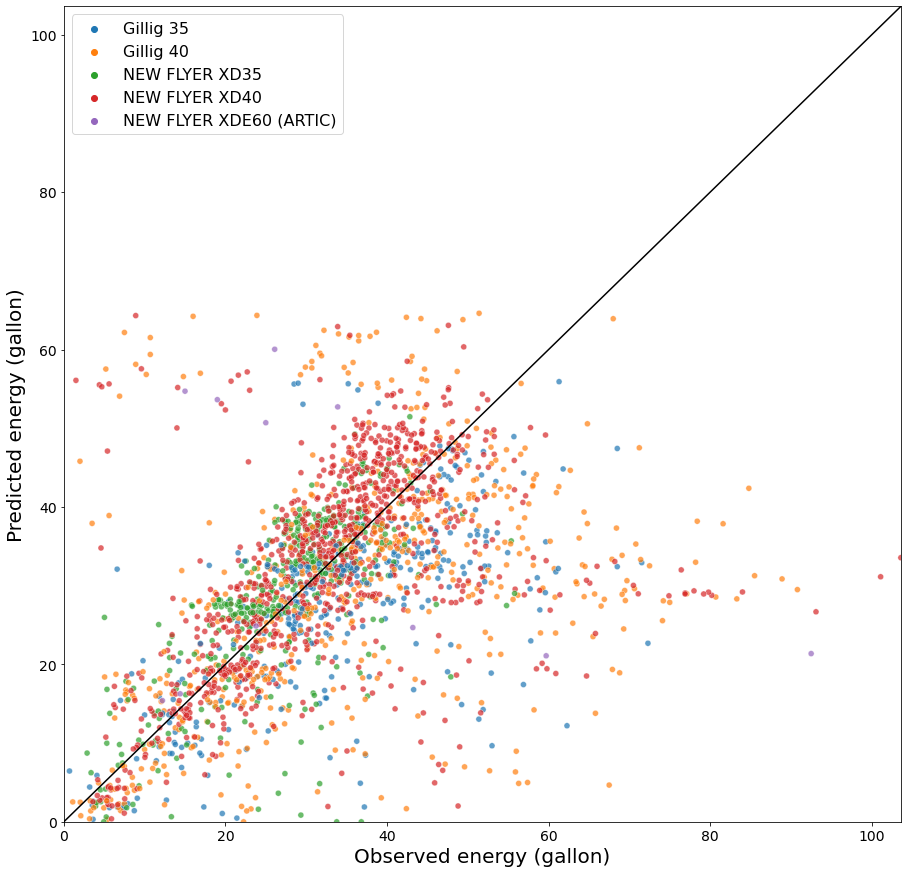

In [530]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['Real_Energy']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


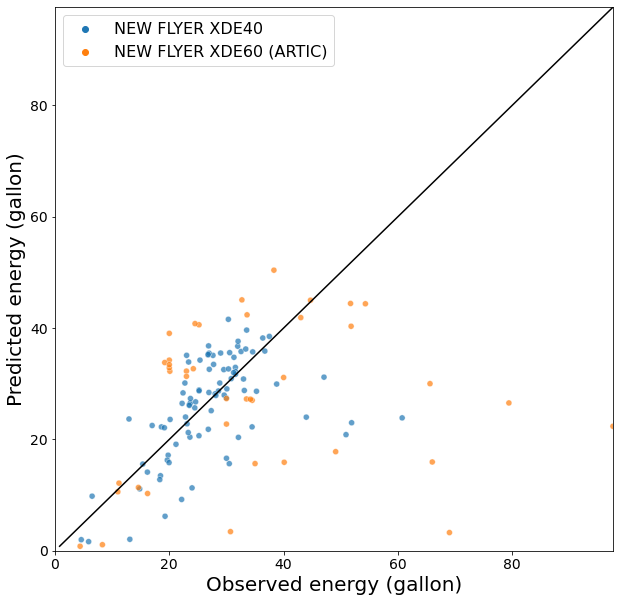

In [531]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_hybrid, hue='VehicleModel', alpha=0.7)


p1 = max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['Real_Energy']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

In [452]:
# Filltering abnormal large numbers from the validation and set them as a max
df_conventional['Real_Energy'].values[df_conventional['Real_Energy'].values > 50] = 50
df_hybrid['Real_Energy'].values[df_hybrid['Real_Energy'].values > 40] = 40

In [453]:
df_conventional['Real_Energy'].max()

50.0

In [454]:
df_hybrid['Real_Energy'].max()

40.0

In [455]:
rmse_conventional = mean_squared_error(df_conventional['Real_Energy'], df_conventional['Energy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Energy'], df_hybrid['Energy'], squared=False)

In [456]:
rmse_conventional

11.661945163910708

In [457]:
rmse_hybrid

9.583272346522135

In [260]:
df_conventional.nlargest(10,['Energy'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy
2571,3402,2022-04-01,68.015782,conventional,177.027284,NEW FLYER XDE60 (ARTIC),38.3
2123,3222,2022-04-30,64.610475,conventional,170.241088,Gillig 40,51.4
2439,3319,2022-04-08,64.338878,conventional,183.433558,Gillig 40,23.9
2546,3325,2022-04-17,64.316118,conventional,170.352755,NEW FLYER XD40,8.9
2205,3303,2022-04-01,64.220834,conventional,183.993871,Gillig 40,16.0
2192,3301,2022-04-30,64.098862,conventional,182.250534,Gillig 40,42.4
2260,3305,2022-04-23,63.936369,conventional,182.909200,Gillig 40,44.2
2140,3225,2022-04-16,63.917187,conventional,183.928896,Gillig 40,68.0
2434,3319,2022-04-02,63.803633,conventional,182.996154,Gillig 40,49.4
2583,3402,2022-04-29,63.241550,conventional,136.477200,NEW FLYER XDE60 (ARTIC),32.7


In [261]:
df_hybrid.nlargest(10,['Energy'])

,Vehicle,Date,Energy,Powertrain,Distance,VehicleModel,Real_Energy
2975,7901,2022-04-15,41.870881,hybrid,157.484328,NEW FLYER XDE60 (ARTIC),43.00
1296,1805,2022-04-19,41.561804,hybrid,174.278975,NEW FLYER XDE40,30.33
3009,7902,2022-04-30,41.266504,hybrid,156.909658,NEW FLYER XDE60 (ARTIC),26.10
2982,7901,2022-04-23,40.792381,hybrid,156.208007,NEW FLYER XDE60 (ARTIC),24.50
2962,7901,2022-04-02,40.579868,hybrid,156.658609,NEW FLYER XDE60 (ARTIC),25.20
2976,7901,2022-04-16,40.314738,hybrid,156.819501,NEW FLYER XDE60 (ARTIC),45.00
1201,1801,2022-04-08,39.626796,hybrid,156.441346,NEW FLYER XDE40,33.53
2974,7901,2022-04-14,39.042729,hybrid,139.633270,NEW FLYER XDE60 (ARTIC),20.00
1252,1803,2022-04-11,38.495228,hybrid,165.081090,NEW FLYER XDE40,37.50
1277,1804,2022-04-20,38.207168,hybrid,157.933218,NEW FLYER XDE40,36.35


C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


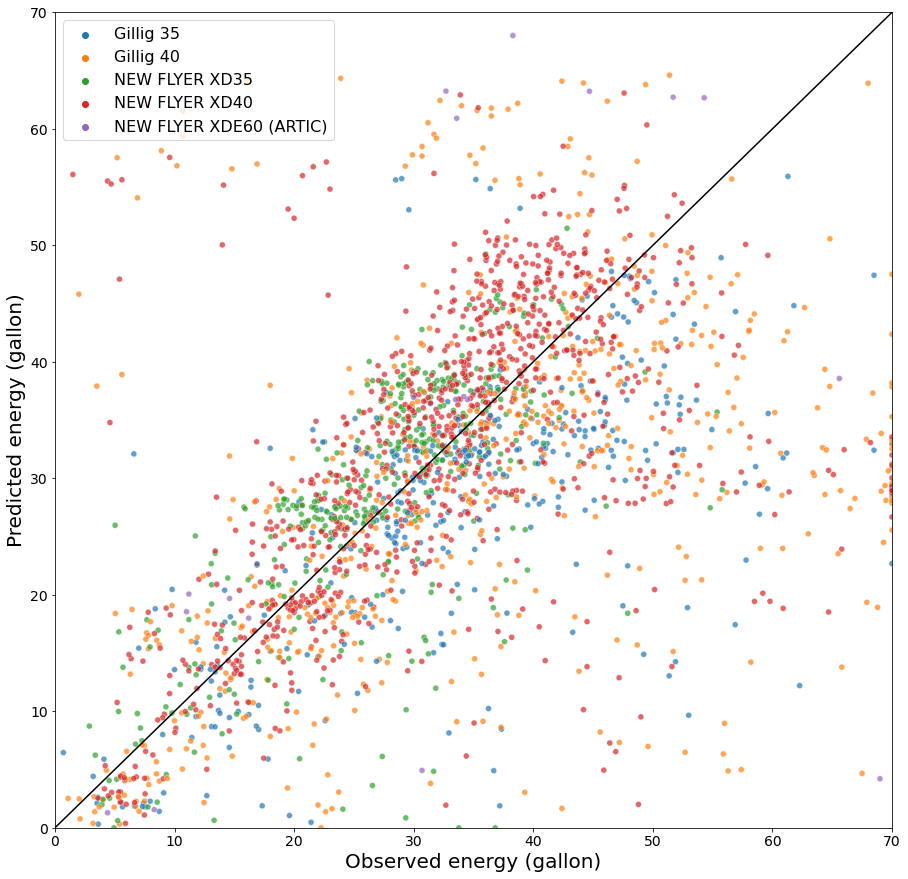

In [263]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['Real_Energy']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
#fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


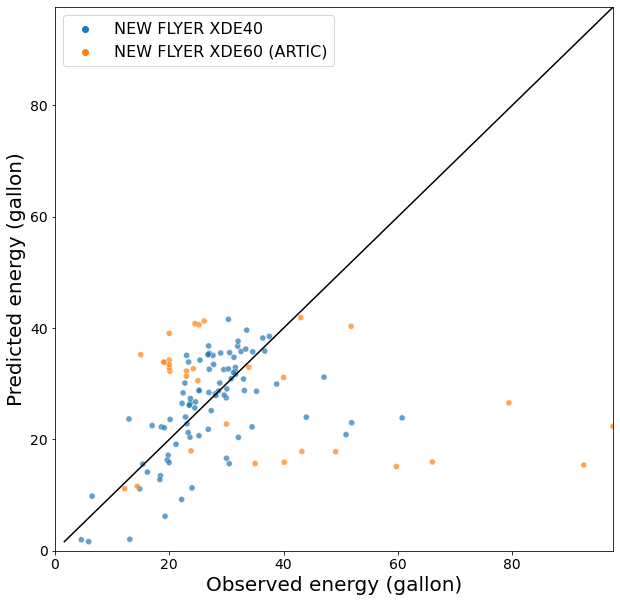

In [270]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_hybrid, hue='VehicleModel', alpha=0.7)


p1 = max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['Real_Energy']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
#fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()